In [7]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP, analysis

In [8]:
path = get_project_path()
M = dataset.load_dataset10a( path)
M.shape

Data: 20231222_GASP_ANKLE data exists
Path: /Users/michael/projects/imperial/GASP/notebooks/experiments/../../gasp/../data/20231222_GASP_ANKLE/dixon/
Loading files: ['meas_MID237_gre_TE3p41_FID58149.dat', 'meas_MID239_gre_TE5p68_FID58151.dat', 'meas_MID238_gre_TE4p55_FID58150.dat']
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 3)

(128, 128, 8, 3)


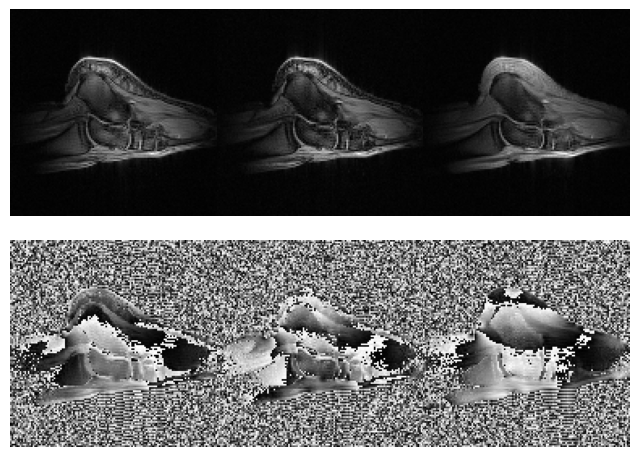

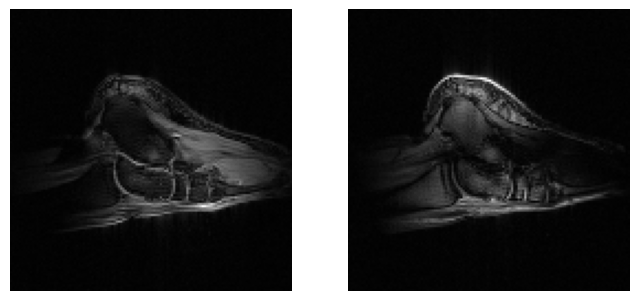

In [9]:
Mw, Mf = analysis.dixon_3pt(M)
analysis.plot_dixon_inputdata(M)
analysis.plot_dixon(Mw, Mf)

(1, 256)
(1, 256)


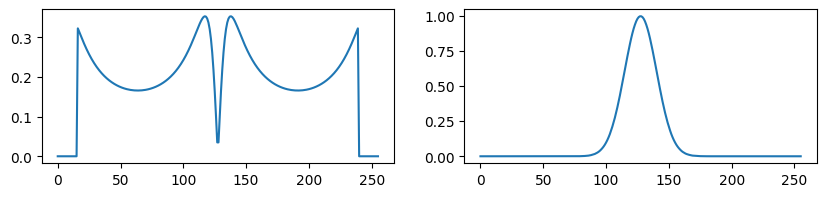

In [10]:
analysis.gasp_plot_train(alpha = 20, bw = 0.2, shift = 0, method='lev-mar-quad')

In [11]:
M_phantom20 = dataset.load_dataset10b(path)
M_phantom90 = dataset.load_dataset10c(path)

from IPython.display import clear_output
clear_output(wait=True)
print('', flush=True)

print(f'M20: {M_phantom20.shape}')
print(f'M90: {M_phantom90.shape}')


M20: (256, 256, 8, 16, 3)
M90: (256, 256, 8, 16, 3)


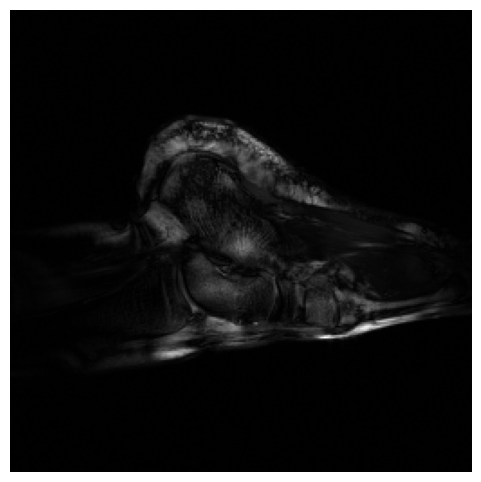

In [27]:
def plot_gasp_sweep(dataset):
    length = len(dataset)
    f = plt.figure(figsize=(20,6))
    for i in range(length):
        data0 = dataset[i][0]
        ax = f.add_subplot(1, length, i + 1)
        ax.imshow(data0, cmap='gray')
        ax.axis('off')
    plt.show()

def gasp_train_and_run(Mdata, **options):
    defaultOptions = { 'method':'linear', 'alpha':20, 'shift':20, 'bw':0.2 }
    options = { **defaultOptions, **options }
    
    Ic, An, _ = analysis.gasp_train(alpha=options['alpha'], bw=options['bw'], shift=options['shift'], method=options['method'])
    output = analysis.gasp_run_model(Mdata, An, method=options['method'])

    plot_gasp_sweep([[output, Ic]])
    return output, Ic, An

_ = gasp_train_and_run(M_phantom90, alpha=25, bw=20, shift=0.5, method='lev-mar-quad')
